In [ ]:
# МЕТОД PIVOT_TABLE ДЛЯ ПОСТРОЕНИЯ СВОДНЫХ ТАБЛИЦ
# table = pd.pivot_table(df, parameters)
# Parameters:
# (values=None, 
# index=None, 
# columns=None, 
# aggfunc='mean', 
# fill_value=None, 
# margins=False, 
# dropna=True, 
# margins_name='All', 
# observed=False, 
# sort=True)

In [ ]:
# values — имя столбца, по которому необходимо получить сводные данные, применяя агрегирующую функцию;
# index — имя столбца, значения которого станут строками сводной таблицы;
# columns — имя столбца, значения которого станут столбцами сводной таблицы;
# aggfunc — имя или список имён агрегирующих функций (по умолчанию — подсчёт среднего, 'mean');
# fill_value — значение, которым необходимо заполнить пропуски (по умолчанию пропуски не заполняются).

In [16]:
import pandas as pd
melb_df = pd.read_csv('data/melb_data_fe.csv')
melb_df['Date'] = pd.to_datetime(melb_df['Date'])

In [17]:
# построим таблицу с использованием метода pivot_table. 
# В качестве параметра values укажем столбец Price, 
# в качестве индексов сводной таблицы возьмём Rooms, 
# а в качестве столбцов — Type. 
# Агрегирующую функцию оставим по умолчанию (среднее). 
# Дополнительно заменим пропуски в таблице на значение 0. 
# Финальный результат для наглядности вывода округлим с помощью метода round() до целых.
melb_df.pivot_table(
    values = 'Price',
    index = 'Rooms',
    columns = 'Type',
    aggfunc = 'mean',
    fill_value = 0
).round()

Type,house,townhouse,unit
Rooms,,,
1,866866.0,592705.0,389929.0
2,1017238.0,710158.0,610491.0
3,1109233.0,984709.0,850596.0
4,1462283.0,1217092.0,1037476.0
5,1877327.0,1035000.0,0.0
6,1869508.0,0.0,520000.0
7,1920700.0,0.0,0.0
8,1510286.0,0.0,2250000.0
10,900000.0,0.0,0.0


In [8]:
# проанализируем продажи в каждом из регионов в зависимости от того, будний был день или выходной (Price). 
# Для этого построим сводную таблицу, в которой строками будут являться названия регионов (Regionname), 
# а в столбцах будет располагаться наш «признак-мигалка» выходного дня (Weekend), который равен 1, если день был выходным, и 0 — в противном случае. 
# В качестве значений сводной таблицы возьмём количество продаж.
melb_df.pivot_table(
    values = 'Price',
    index = 'Regionname',
    columns = 'Weekend',
    aggfunc = 'count'
)

Weekend,0,1
Regionname,,
Eastern Metropolitan,447,1024
Eastern Victoria,13,40
Northern Metropolitan,1258,2632
Northern Victoria,11,30
South-Eastern Metropolitan,123,327
Southern Metropolitan,1534,3161
Western Metropolitan,960,1988
Western Victoria,8,24


In [17]:
# найдём, как зависит средняя и медианная площадь участка (Landsize) от типа объекта (Type) и его региона (Regionname). 
# Чтобы посмотреть несколько статистических параметров, нужно передать в аргумент aggfunc список из агрегирующих функций. 
# Построим такую сводную таблицу, где пропущенные значения заменим на 0:
melb_df.pivot_table(
    values = 'Landsize',
    index = 'Regionname',
    columns = 'Type',
    aggfunc = ['mean', 'median', 'count'],
    fill_value = 0
)

mean                         median  \
Type                              house   townhouse        unit  house   
Regionname                                                               
Eastern Metropolitan         717.422847  269.440678  330.444444  674.0   
Eastern Victoria            3108.960000    0.000000  295.333333  843.0   
Northern Metropolitan        619.249092  317.325733  495.026538  459.5   
Northern Victoria           3355.463415    0.000000    0.000000  724.0   
South-Eastern Metropolitan   664.306701  212.160000  357.864865  630.5   
Southern Metropolitan        569.643881  278.858824  466.380245  586.0   
Western Metropolitan         507.883406  244.560669  557.637232  531.0   
Western Victoria             655.500000    0.000000    0.000000  599.5   

                                          count                  
Type                       townhouse unit house townhouse  unit  
Regionname                                                       
Eastern Metropolitan           233.5  203  1173       118   180  
Eastern Victoria                 0.0  230    50         0     3  
Northern Metropolitan          134.0    0  2754       307   829  
Northern Victoria                0.0    0    41         0     0  
South-Eastern Metropolitan     240.0  199   388        25    37  
Southern Metropolitan          246.0    0  2721       425  1549  
Western Metropolitan           198.0   62  2290       239   419  
Western Victoria                 0.0    0    32         0     0

In [ ]:
# МНОГОМЕРНЫЕ СВОДНЫЕ ТАБЛИЦЫ
# сводные таблицы позволяют наблюдать зависимость и от большего числа признаков
# передать список признаков в параметр index или параметр columns

In [19]:
# построим таблицу, в которой по индексам будут располагаться признаки метода продажи (Method) и типа объекта (Type),
# по столбцам — наименование региона (Regionname), 
# а на пересечении строк и столбцов будет стоять медианная цена объекта (Price):
melb_df.pivot_table(
    values = 'Price',
    index = ['Method', 'Type'],
    columns = 'Regionname',
    aggfunc = 'median',
    fill_value = 0
)

Regionname        Eastern Metropolitan  Eastern Victoria  \
Method Type                                                
PI     house                   1244000            780000   
       townhouse                760000                 0   
       unit                     650000                 0   
S      house                   1127000            675000   
       townhouse                828000                 0   
       unit                     645750            492000   
SA     house                    932500            950000   
       townhouse                807500                 0   
       unit                          0                 0   
SP     house                   1050000            672500   
       townhouse                910000                 0   
       unit                     515000            400000   
VB     house                   1100000            712500   
       townhouse                892500                 0   
       unit                     500000                 0   

Regionname        Northern Metropolitan  Northern Victoria  \
Method Type                                                  
PI     house                     900000             500000   
       townhouse                 632500                  0   
       unit                      410000                  0   
S      house                     920000             555000   
       townhouse                 750000                  0   
       unit                      525500                  0   
SA     house                     817500             540000   
       townhouse                 425000                  0   
       unit                      616000                  0   
SP     house                     900000             521000   
       townhouse                 690000                  0   
       unit                      470000                  0   
VB     house                    1050000             690000   
       townhouse                 640000                  0   
       unit                      450000                  0   

Regionname        South-Eastern Metropolitan  Southern Metropolitan  \
Method Type                                                           
PI     house                          865000                1725000   
       townhouse                     1190000                1055000   
       unit                           525000                 571250   
S      house                          883300                1611000   
       townhouse                      875000                1135000   
       unit                           606000                 655000   
SA     house                          880000                1390000   
       townhouse                           0                1141000   
       unit                                0                 580000   
SP     house                          770000                1521750   
       townhouse                      800000                1162500   
       unit                           601000                 550000   
VB     house                          850000                1800000   
       townhouse                           0                1250000   
       unit                           700000                 500000   

Regionname        Western Metropolitan  Western Victoria  
Method Type                                               
PI     house                    870000            630000  
       townhouse                670000                 0  
       unit                     360000                 0  
S      house                    870000            397500  
       townhouse                729000                 0  
       unit                     489000                 0  
SA     house                    772500                 0  
       townhouse                467500                 0  
       unit                     571000                 0  
SP     house                    865000            360000  
       t

In [ ]:
# ДОСТУП К ДАННЫМ В СВОДНОЙ ТАБЛИЦЕ
# получить доступ к данным или произвести фильтрацию в сложной сводной таблице, где есть дополнительные индексы

In [22]:
# Запишем сводную таблицу, которую мы создавали ранее в переменную pivot:
pivot = pd.pivot_table(melb_df, 
                       values = 'Landsize',
                       index = 'Regionname',
                       columns = 'Type',
                       aggfunc = ['mean', 'median'],
                       fill_value = 0)
# Выведем её столбцы с помощью атрибута columns
pivot.columns

MultiIndex([(  'mean',     'house'),
            (  'mean', 'townhouse'),
            (  'mean',      'unit'),
            ('median',     'house'),
            ('median', 'townhouse'),
            ('median',      'unit')],
           names=[None, 'Type'])

In [ ]:
# В результате мы получаем объект MultiIndex. 
# Этот объект хранит в себе шесть комбинаций пар столбцов (два статистических параметра и три типа здания), 
# то есть есть шесть возможных вариантов обращения к столбцам таблицы.
# Мультииндексы раскрываются подобно вложенным словарям — по очереди, как матрёшка. 
# Чтобы получить доступ к определённому столбцу, вы должны сначала обратиться к столбцу, который находится уровнем выше

In [23]:
# из таблицы pivot мы можем получить средние значения площадей участков для типа здания unit, 
# просто последовательно обратившись по имени столбцов:
display(pivot['mean']['unit'])

Regionname
Eastern Metropolitan          330.444444
Eastern Victoria              295.333333
Northern Metropolitan         495.026538
Northern Victoria               0.000000
South-Eastern Metropolitan    357.864865
Southern Metropolitan         466.380245
Western Metropolitan          557.637232
Western Victoria                0.000000
Name: unit, dtype: float64

In [26]:
display(pivot['median']['townhouse'])

Regionname
Eastern Metropolitan          233.5
Eastern Victoria                0.0
Northern Metropolitan         134.0
Northern Victoria               0.0
South-Eastern Metropolitan    240.0
Southern Metropolitan         246.0
Western Metropolitan          198.0
Western Victoria                0.0
Name: townhouse, dtype: float64

In [ ]:
# фильтрация данных

In [27]:
# Например, если нам нужны регионы, в которых средняя площадь здания для домов типа house меньше их медианной площади, то мы можем найти их следующим образом:
mask = (pivot['mean']['house'] < pivot['median']['house'])
filter_pivot = pivot[mask]
display(filter_pivot)

mean                         median            \
Type                        house   townhouse        unit  house townhouse   
Regionname                                                                   
Southern Metropolitan  569.643881  278.858824  466.380245  586.0     246.0   
Western Metropolitan   507.883406  244.560669  557.637232  531.0     198.0   

                            
Type                  unit  
Regionname                  
Southern Metropolitan    0  
Western Metropolitan    62

In [33]:
# Чтобы получить индексы отфильтрованной таблицы,
# можно воспользоваться атрибутом index и обернуть результат в список
display(list(pivot.index))

['Eastern Metropolitan',
 'Eastern Victoria',
 'Northern Metropolitan',
 'Northern Victoria',
 'South-Eastern Metropolitan',
 'Southern Metropolitan',
 'Western Metropolitan',
 'Western Victoria']

In [39]:
# Примечание. На самом деле мультииндексные таблицы можно создавать и вручную. Давайте посмотрим на синтаксис данной конструкции:
import numpy as np
mser = pd.Series(
    np.random.rand(8),
	index=[['white','white','white','blue','blue','red','red','red'], 
           ['up','down','right','up','down','up','down','left']])
display(mser)

white  up       0.656863
       down     0.191232
       right    0.566103
blue   up       0.269692
       down     0.193184
red    up       0.347636
       down     0.304256
       left     0.446245
dtype: float64

In [40]:
# В данном примере мы создаём объект Series со вложенными индексами. Мы передаём в качестве индексов Series вложенный список, 
# где первый список задаёт внешний уровень вложенности, а второй список — внутренний уровень вложенности
mser.index

MultiIndex([('white',    'up'),
            ('white',  'down'),
            ('white', 'right'),
            ( 'blue',    'up'),
            ( 'blue',  'down'),
            (  'red',    'up'),
            (  'red',  'down'),
            (  'red',  'left')],
           )

In [41]:
# Аналогично создаются DataFrame со вложенными признаками (вложенными столбцами) — для этого вложенный список передаётся в параметр columns при инициализации таблицы:
mframe = pd.DataFrame(
    np.random.randn(16).reshape(4,4),
    index=[['white','white','red','red'], ['up','down','up','down']],
    columns=[['pen','pen','paper','paper'],[1,2,1,2]]
)
display(mframe)

pen               paper          
                   1         2         1         2
white up   -1.357564 -0.793772 -1.174957 -1.216105
      down  1.566427 -1.523725 -1.847211 -0.298751
red   up   -0.133898  0.913258  0.119770  1.301968
      down  1.338564  0.486239  0.378826 -0.973831

In [42]:
mframe.columns

MultiIndex([(  'pen', 1),
            (  'pen', 2),
            ('paper', 1),
            ('paper', 2)],
           )

In [44]:
# Составьте сводную таблицу, которая показывает зависимость медианной площади (BuildingArea) здания от типа объекта недвижимости (Type) и количества жилых комнат в доме (Rooms). Для какой комбинации признаков площадь здания наибольшая?
# В качестве ответа запишите эту комбинацию (тип здания, число комнат) через запятую, без пробелов.
melb_df.pivot_table(
    values = 'BuildingArea',
    index =  'Type',
    columns = 'Rooms',
    aggfunc = 'median',
    fill_value = 0
)
# house,7

Rooms,1,2,3,4,5,6,7,8,10
Type,,,,,,,,,
house,126.0,126,126,141.0,177,126,216.5,126,126
townhouse,88.0,114,126,159.5,152,0,0.0,0,0
unit,69.5,110,126,126.0,0,171,0.0,126,0


In [48]:
# Составьте сводную таблицу, которая показывает зависимость средней цены объекта недвижимости (Price) от риелторского агентства (SellerG) и типа здания (Type).
# Во вновь созданной таблице найдите агентство, у которого средняя цена для зданий типа unit максимальна. В качестве ответа запишите название этого агентства.
pivot = melb_df.pivot_table(
    values = 'Price',
    index = 'SellerG',
    columns = 'Type',
    aggfunc = 'mean',
    fill_value = 0
)
display('сводная таблица, которая показывает зависимость средней цены объекта недвижимости', pivot)
pivot_max = pivot['unit'].max() # filter of max
agensy_unit_max = pivot[pivot['unit'] == pivot_max].index[0]
print('агентство, у которого средняя цена для зданий типа unit максимальна:', agensy_unit_max)
# Nick

'сводная таблица, которая показывает зависимость средней цены объекта недвижимости'

Type,house,townhouse,unit
SellerG,,,
Alexkarbon,1.103278e+06,9.220000e+05,556172.666667
Barry,9.331888e+05,7.525791e+05,555870.512821
Bells,7.262763e+05,4.305000e+05,481250.000000
Biggin,1.270929e+06,7.210370e+05,568020.833333
Brad,9.571346e+05,6.978846e+05,480924.657534
Buckingham,8.480634e+05,9.783333e+05,553000.000000
Burnham,8.567692e+05,0.000000e+00,297730.769231
Buxton,1.439187e+06,1.138067e+06,664625.954198
C21,9.693400e+05,7.687500e+05,700700.000000


агентство, у которого средняя цена для зданий типа unit максимальна: Nick


Text(0, 0.5, 'Тип объекта')

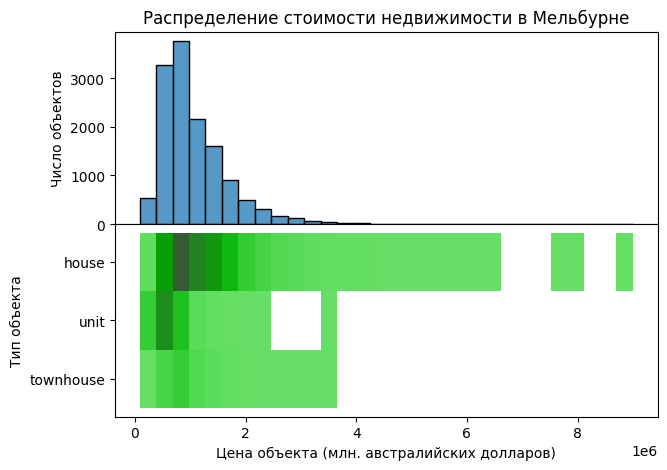

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
plt.style.use('default')

melb_data = pd.read_csv('data/melb_data_fe.csv')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 5))
plt.subplots_adjust(hspace=.0)

histplot1 = sns.histplot(
    data=melb_data, 
    x='Price', 
    bins=30,
    ax=axes[0],
)
histplot1.set_title('Распределение стоимости недвижимости в Мельбурне', fontsize=12)
histplot1.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot1.set_ylabel('Число объектов')

histplot2 = sns.histplot(
    data=melb_data,
    x='Price',
    y='Type',
    bins=30,
    color='green',
    ax=axes[1]
)
histplot2.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot2.set_ylabel('Тип объекта')


In [13]:
import matplotlib.pyplot as plt


In [10]:
import seaborn as sns
print(sns.__version__)

0.11.2


In [4]:
? ModuleNotFoundError

Init signature:  ModuleNotFoundError(self, /, *args, **kwargs)
Docstring:      Module not found.
Type:           type
Subclasses:     


In [5]:
pip install matplotlib

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



     ---------------------------------------- 7.2/7.2 MB 321.0 kB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 297.6 kB/s eta 0:00:00
     ------------------------------------ 900.8/900.8 KB 140.7 kB/s eta 0:00:00
     -------------------------------------- 40.8/40.8 KB 162.3 kB/s eta 0:00:00
     --------------------------------------- 55.3/55.3 KB 29.1 kB/s eta 0:00:00
     --------------------------------------- 98.5/98.5 KB 81.9 kB/s eta 0:00:00


In [6]:
pip install seaborn

     ------------------------------------ 292.8/292.8 KB 190.4 kB/s eta 0:00:00
     ---------------------------------------- 37.0/37.0 MB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
import seaborn as sns
print(sns.__version__)

0.11.2


In [8]:
pip install plotly

  Using cached plotly-5.7.0-py2.py3-none-any.whl (28.8 MB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
import plotly
import plotly.express as px
print(plotly.__version__)

5.7.0
